# Time Series

In [1]:
import numpy as np
import pandas as pd
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.set_printoptions(precision=4, suppress=True)

## Date and Time Data Types and Tools

In [ ]:
from datetime import datetime
now = datetime.now()
now
now.year, now.month, now.day

In [ ]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
delta
delta.days
delta.seconds

In [ ]:
from datetime import timedelta
start = datetime(2011, 1, 7)
start + timedelta(12)
start - 2 * timedelta(12)

### Converting Between String and Datetime

In [ ]:
stamp = datetime(2011, 1, 3)
str(stamp)
stamp.strftime('%Y-%m-%d')

In [ ]:
value = '2011-01-03'
datetime.strptime(value, '%Y-%m-%d')
datestrs = ['7/6/2011', '8/6/2011']
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

In [ ]:
from dateutil.parser import parse
parse('2011-01-03')

In [ ]:
parse('Jan 31, 1997 10:45 PM')

In [ ]:
parse('6/12/2011', dayfirst=True)

In [ ]:
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']
pd.to_datetime(datestrs)

In [ ]:
idx = pd.to_datetime(datestrs + [None])
idx
idx[2]
pd.isnull(idx)

## Time Series Basics

In [4]:
from datetime import datetime
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = pd.Series(np.random.randn(6), index=dates)
ts

2011-01-02    0.274992
2011-01-05    0.228913
2011-01-07    1.352917
2011-01-08    0.886429
2011-01-10   -2.001637
2011-01-12   -0.371843
dtype: float64

In [5]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [6]:
ts + ts[::2]

2011-01-02    0.549983
2011-01-05         NaN
2011-01-07    2.705834
2011-01-08         NaN
2011-01-10   -4.003275
2011-01-12         NaN
dtype: float64

In [7]:
ts.index.dtype

dtype('<M8[ns]')

In [8]:
stamp = ts.index[0]
stamp

Timestamp('2011-01-02 00:00:00')

### Indexing, Selection, Subsetting

In [ ]:
stamp = ts.index[2]
ts[stamp]

In [ ]:
ts['1/10/2011']
ts['20110110']

In [ ]:
longer_ts = pd.Series(np.random.randn(1000),
                      index=pd.date_range('1/1/2000', periods=1000))
longer_ts
longer_ts['2001']

In [ ]:
longer_ts['2001-05']

In [ ]:
ts[datetime(2011, 1, 7):]

In [11]:
ts
ts['1/6/2011':'1/11/2011']

2011-01-07    1.352917
2011-01-08    0.886429
2011-01-10   -2.001637
dtype: float64

In [ ]:
ts.truncate(after='1/9/2011')

In [ ]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')
long_df = pd.DataFrame(np.random.randn(100, 4),
                       index=dates,
                       columns=['Colorado', 'Texas',
                                'New York', 'Ohio'])
long_df.loc['5-2001']

### Time Series with Duplicate Indices

In [ ]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000',
                          '1/2/2000', '1/3/2000'])
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

In [ ]:
dup_ts.index.is_unique

In [ ]:
dup_ts['1/3/2000']  # not duplicated
dup_ts['1/2/2000']  # duplicated

In [ ]:
grouped = dup_ts.groupby(level=0)
grouped.mean()
grouped.count()

## Date Ranges, Frequencies, and Shifting

In [ ]:
ts
resampler = ts.resample('D')

### Generating Date Ranges

In [ ]:
index = pd.date_range('2012-04-01', '2012-06-01')
index

In [ ]:
pd.date_range(start='2012-04-01', periods=20)
pd.date_range(end='2012-06-01', periods=20)

In [ ]:
pd.date_range('2000-01-01', '2000-12-01', freq='BM')

In [ ]:
pd.date_range('2012-05-02 12:56:31', periods=5)

In [ ]:
pd.date_range('2012-05-02 12:56:31', periods=5, normalize=True)

### Frequencies and Date Offsets

In [ ]:
from pandas.tseries.offsets import Hour, Minute
hour = Hour()
hour

In [ ]:
four_hours = Hour(4)
four_hours

In [ ]:
pd.date_range('2000-01-01', '2000-01-03 23:59', freq='4h')

In [ ]:
Hour(2) + Minute(30)

In [ ]:
pd.date_range('2000-01-01', periods=10, freq='1h30min')

#### Week of month dates

In [ ]:
rng = pd.date_range('2012-01-01', '2012-09-01', freq='WOM-3FRI')
list(rng)

### Shifting (Leading and Lagging) Data

In [ ]:
ts = pd.Series(np.random.randn(4),
               index=pd.date_range('1/1/2000', periods=4, freq='M'))
ts
ts.shift(2)
ts.shift(-2)

ts / ts.shift(1) - 1

In [ ]:
ts.shift(2, freq='M')

In [ ]:
ts.shift(3, freq='D')
ts.shift(1, freq='90T')

#### Shifting dates with offsets

In [ ]:
from pandas.tseries.offsets import Day, MonthEnd
now = datetime(2011, 11, 17)
now + 3 * Day()

In [ ]:
now + MonthEnd()
now + MonthEnd(2)

In [ ]:
offset = MonthEnd()
offset.rollforward(now)
offset.rollback(now)

In [ ]:
ts = pd.Series(np.random.randn(20),
               index=pd.date_range('1/15/2000', periods=20, freq='4d'))
ts
ts.groupby(offset.rollforward).mean()

In [ ]:
ts.resample('M').mean()

## Time Zone Handling

In [ ]:
import pytz
pytz.common_timezones[-5:]

In [ ]:
tz = pytz.timezone('America/New_York')
tz

### Time Zone Localization and Conversion

In [ ]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

In [ ]:
print(ts.index.tz)

In [ ]:
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')

In [ ]:
ts
ts_utc = ts.tz_localize('UTC')
ts_utc
ts_utc.index

In [ ]:
ts_utc.tz_convert('America/New_York')

In [ ]:
ts_eastern = ts.tz_localize('America/New_York')
ts_eastern.tz_convert('UTC')
ts_eastern.tz_convert('Europe/Berlin')

In [ ]:
ts.index.tz_localize('Asia/Shanghai')

### Operations with Time Zone−Aware Timestamp Objects

In [ ]:
stamp = pd.Timestamp('2011-03-12 04:00')
stamp_utc = stamp.tz_localize('utc')
stamp_utc.tz_convert('America/New_York')

In [ ]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')
stamp_moscow

In [ ]:
stamp_utc.value
stamp_utc.tz_convert('America/New_York').value

In [ ]:
from pandas.tseries.offsets import Hour
stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')
stamp
stamp + Hour()

In [ ]:
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')
stamp
stamp + 2 * Hour()

### Operations Between Different Time Zones

In [ ]:
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts
ts1 = ts[:7].tz_localize('Europe/London')
ts2 = ts1[2:].tz_convert('Europe/Moscow')
result = ts1 + ts2
result.index

## Periods and Period Arithmetic

In [ ]:
p = pd.Period(2007, freq='A-DEC')
p

In [ ]:
p + 5
p - 2

In [ ]:
pd.Period('2014', freq='A-DEC') - p

In [3]:
rng = pd.period_range('2000-01-01', '2000-06-30', freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [6]:
pd.Series(np.random.randn(6), index=rng)

2000-01   -2.001637
2000-02   -0.371843
2000-03    1.669025
2000-04   -0.438570
2000-05   -0.539741
2000-06    0.476985
Freq: M, dtype: float64

In [ ]:
values = ['2001Q3', '2002Q2', '2003Q1']
index = pd.PeriodIndex(values, freq='Q-DEC')
index

### Period Frequency Conversion

In [ ]:
p = pd.Period('2007', freq='A-DEC')
p
p.asfreq('M', how='start')
p.asfreq('M', how='end')

In [ ]:
p = pd.Period('2007', freq='A-JUN')
p
p.asfreq('M', 'start')
p.asfreq('M', 'end')

In [ ]:
p = pd.Period('Aug-2007', 'M')
p.asfreq('A-JUN')

In [2]:
rng = pd.period_range('2006', '2009', freq='A-DEC')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts
ts.asfreq('M', how='start')

2006-01   -0.204708
2007-01    0.478943
2008-01   -0.519439
2009-01   -0.555730
Freq: M, dtype: float64

In [ ]:
ts.asfreq('B', how='end')

### Quarterly Period Frequencies

In [2]:
p = pd.Period('2012Q4', freq='Q-JAN')
p

Period('2012Q4', 'Q-JAN')

In [3]:
p.asfreq('D', 'start')
p.asfreq('D', 'end')

Period('2012-01-31', 'D')

In [4]:
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
p4pm
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

In [ ]:
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')
ts = pd.Series(np.arange(len(rng)), index=rng)
ts
new_rng = (rng.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
ts.index = new_rng.to_timestamp()
ts

### Converting Timestamps to Periods (and Back)

In [ ]:
rng = pd.date_range('2000-01-01', periods=3, freq='M')
ts = pd.Series(np.random.randn(3), index=rng)
ts
pts = ts.to_period()
pts

In [ ]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')
ts2 = pd.Series(np.random.randn(6), index=rng)
ts2
ts2.to_period('M')

In [ ]:
pts = ts2.to_period()
pts
pts.to_timestamp(how='end')

### Creating a PeriodIndex from Arrays

In [ ]:
data = pd.read_csv('examples/macrodata.csv')
data.head(5)
data.year
data.quarter

In [ ]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter,
                       freq='Q-DEC')
index
data.index = index
data.infl

## Resampling and Frequency Conversion

In [ ]:
rng = pd.date_range('2000-01-01', periods=100, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts
ts.resample('M').mean()
ts.resample('M', kind='period').mean()

### Downsampling

In [8]:
rng = pd.date_range('2000-01-01 00:03:00', periods=12, freq='T')
ts = pd.Series(np.arange(12), index=rng)
ts

2000-01-01 00:03:00     0
2000-01-01 00:04:00     1
2000-01-01 00:05:00     2
2000-01-01 00:06:00     3
2000-01-01 00:07:00     4
2000-01-01 00:08:00     5
2000-01-01 00:09:00     6
2000-01-01 00:10:00     7
2000-01-01 00:11:00     8
2000-01-01 00:12:00     9
2000-01-01 00:13:00    10
2000-01-01 00:14:00    11
Freq: T, dtype: int32

In [9]:
ts.resample('5min').count()

2000-01-01 00:00:00    2
2000-01-01 00:05:00    5
2000-01-01 00:10:00    5
Freq: 5T, dtype: int64

In [10]:
ts.resample('5min', closed='right').count()

2000-01-01 00:00:00    3
2000-01-01 00:05:00    5
2000-01-01 00:10:00    4
Freq: 5T, dtype: int64

In [ ]:
ts.resample('5min', closed='right', label='right').sum()

In [ ]:
ts.resample('5min', closed='right',
            label='right', loffset='-1s').sum()

#### Open-High-Low-Close (OHLC) resampling

In [ ]:
ts.resample('5min').ohlc()

### Upsampling and Interpolation

In [14]:
frame = pd.DataFrame(np.random.randn(2, 4),
                     index=pd.date_range('1/1/2000', periods=2,
                                         freq='W-WED'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,0.769023,1.246435,1.007189,-1.296221
2000-01-12,0.274992,0.228913,1.352917,0.886429


In [18]:
df_daily = frame.resample('D').asfreq()
df_daily

In [ ]:
frame.resample('D').ffill()

In [ ]:
frame.resample('D').ffill(limit=2)

In [17]:
frame.resample('W-THU').asfreq()

,Colorado,Texas,New York,Ohio
2000-01-06,NaN,NaN,NaN,NaN
2000-01-13,NaN,NaN,NaN,NaN


### Resampling with Periods

In [ ]:
frame = pd.DataFrame(np.random.randn(24, 4),
                     index=pd.period_range('1-2000', '12-2001',
                                           freq='M'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame[:5]
annual_frame = frame.resample('A-DEC').mean()
annual_frame

In [ ]:
# Q-DEC: Quarterly, year ending in December
annual_frame.resample('Q-DEC').ffill()
annual_frame.resample('Q-DEC', convention='end').ffill()

In [ ]:
annual_frame.resample('Q-MAR').ffill()

## Moving Window Functions

In [19]:
close_px_all = pd.read_csv('examples/stock_px_2.csv',
                           parse_dates=True, index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B').ffill()

<AxesSubplot:>

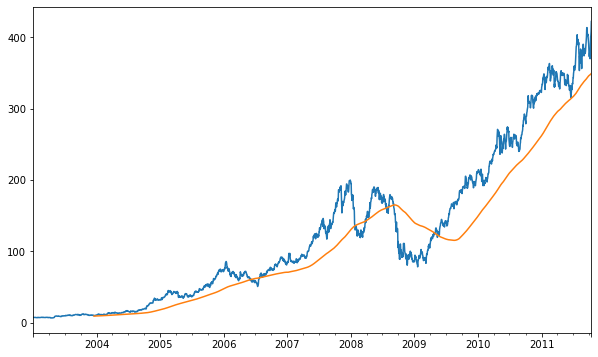

In [20]:
close_px.AAPL.plot()
close_px.AAPL.rolling(250).mean().plot()

In [ ]:
plt.figure()

In [ ]:
appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()
appl_std250[5:12]
appl_std250.plot()

In [ ]:
expanding_mean = appl_std250.expanding().mean()

In [ ]:
plt.figure()

In [ ]:
close_px.rolling(60).mean().plot(logy=True)

In [ ]:
close_px.rolling('20D').mean()

### Exponentially Weighted Functions

In [ ]:
plt.figure()

In [ ]:
aapl_px = close_px.AAPL['2006':'2007']
ma60 = aapl_px.rolling(30, min_periods=20).mean()
ewma60 = aapl_px.ewm(span=30).mean()
ma60.plot(style='k--', label='Simple MA')
ewma60.plot(style='k-', label='EW MA')
plt.legend()

### Binary Moving Window Functions

In [ ]:
plt.figure()

In [ ]:
spx_px = close_px_all['SPX']
spx_rets = spx_px.pct_change()
returns = close_px.pct_change()

In [ ]:
corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

In [ ]:
plt.figure()

In [ ]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

### User-Defined Moving Window Functions

In [ ]:
plt.figure()

In [ ]:
from scipy.stats import percentileofscore
score_at_2percent = lambda x: percentileofscore(x, 0.02)
result = returns.AAPL.rolling(250).apply(score_at_2percent)
result.plot()

In [ ]:
pd.options.display.max_rows = PREVIOUS_MAX_ROWS

## Conclusion